In [111]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [112]:
#clean and analyze data
df = pd.read_csv('train.csv')
label_encoder = LabelEncoder()

columns_to_label_encode = ['Sex', 'Cabin', 'Embarked', 'Ticket', 'Name'] 

for column in columns_to_label_encode:
    if column in df.columns:
        df[column] = label_encoder.fit_transform(df[column])

average_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(average_age)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

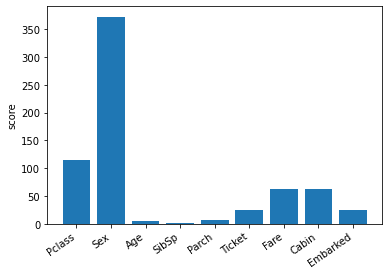

In [113]:
X = df.drop(['Survived', 'PassengerId', 'Name'], axis=1)
y = df['Survived']

bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(X,y)
plt.bar(x=X.columns,height=fit.scores_)
plt.ylabel('score')
plt.xticks(rotation=35, ha='right')

In [114]:
#Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

depths = [7]

for depth in depths:
    rfc = RandomForestClassifier(max_depth=depth)
    rfc.fit(X_train, y_train)

    accuracy = rfc.score(X_test, y_test)
    train_accuracy = rfc.score(X_train, y_train)
    print("Accuracy depth ", depth, ":", accuracy)
    print(f"Test set accuracy: {accuracy}")
    


Accuracy depth  7 : 0.8435754189944135
Test set accuracy: 0.8435754189944135


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)
print(f"Training set accuracy: {train_accuracy}")
print(f"Test set accuracy: {test_accuracy}")

probabilities = knn.predict_proba(X_test)

for p_value in [1, 2, 3, 4, 5]:
    knn = KNeighborsClassifier(p=p_value)
    knn.fit(X_train, y_train)

    train_accuracy = knn.score(X_train, y_train)
    test_accuracy = knn.score(X_test, y_test)
    print(f"\nTraining set accuracy: {train_accuracy}")
    print(f"Test set accuracy: {test_accuracy}")

Training set accuracy: 0.7881219903691814
Test set accuracy: 0.7014925373134329

Training set accuracy: 0.7913322632423756
Test set accuracy: 0.7052238805970149

Training set accuracy: 0.7881219903691814
Test set accuracy: 0.7014925373134329

Training set accuracy: 0.7961476725521669
Test set accuracy: 0.7014925373134329

Training set accuracy: 0.7913322632423756
Test set accuracy: 0.7014925373134329

Training set accuracy: 0.7897271268057785
Test set accuracy: 0.7052238805970149


In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

num_classes = 1

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='sigmoid')  # Assuming a binary classification task
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=20)

test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/20
23/23 [==============================] - 1s 1ms/step - loss: 0.5878 - accuracy: 0.7416
Epoch 2/20
23/23 [==============================] - 0s 2ms/step - loss: 0.4760 - accuracy: 0.7851
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 0.4404 - accuracy: 0.8104
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 0.4233 - accuracy: 0.8104
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8258
Epoch 6/20
23/23 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.8230
Epoch 7/20
23/23 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.8272
Epoch 8/20
23/23 [==============================] - 0s 2ms/step - loss: 0.3897 - accuracy: 0.8427
Epoch 9/20
23/23 [==============================] - 0s 2ms/step - loss: 0.3869 - accuracy: 0.8343
Epoch 10/20
23/23 [==============================] - 0s 2ms/step - loss: 0.3827 - accuracy: 0.8399
Epoch 11/20
23/23 [

In [130]:
df = pd.read_csv('test.csv')
label_encoder = LabelEncoder()

columns_to_label_encode = ['Sex', 'Cabin', 'Embarked', 'Ticket', 'Name'] 

for column in columns_to_label_encode:
    if column in df.columns:
        df[column] = label_encoder.fit_transform(df[column])

average_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(average_age)
average_fare = df['Fare'].mean()
df['Fare'] = df['Fare'].fillna(average_fare)

X = df.drop(['PassengerId', 'Name'], axis=1)
X_test_scaled = scaler.transform(X)


predictions = (model.predict(X_test_scaled) > 0.5).astype(int)
print(predictions.shape)
result_df = pd.DataFrame({'PassengerId': df['PassengerId'], 'Survived': predictions.flatten()})
result_df.to_csv('result.csv', index=False)

14/14 [==============================] - 0s 925us/step
(418, 1)
